 Task 2: Classification Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/student_performance_dataset.csv')

In [3]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


1.	Converting categorical column Passed into numerical labels.

In [5]:
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

In [6]:
print("\n------ Unique Values in 'Passed' After Encoding -----")
print(df['Pass_Fail'].unique())


------ Unique Values in 'Passed' After Encoding -----
[1 0]


2.	Logistic Regression to classify students as Passed or Not.

In [7]:
X = df[['Study_Hours_per_Week', 'Attendance_Rate']]
y = df['Pass_Fail']

3.	Split data using train_test_split.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

4.	Evaluate the model using Accuracy, Confusion Matrix, and Classification Report.

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print(f"\n---- Accuracy ----")
print(f"Accuracy: {accuracy:.2f}")


---- Accuracy ----
Accuracy: 0.75


In [13]:
print(f"\n----- Confusion Matrix -----")
print(conf_matrix)


----- Confusion Matrix -----
[[52 19]
 [17 54]]


In [14]:
print(f"\n----- Classification Report -----")
print(class_report)


----- Classification Report -----
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        71
           1       0.74      0.76      0.75        71

    accuracy                           0.75       142
   macro avg       0.75      0.75      0.75       142
weighted avg       0.75      0.75      0.75       142



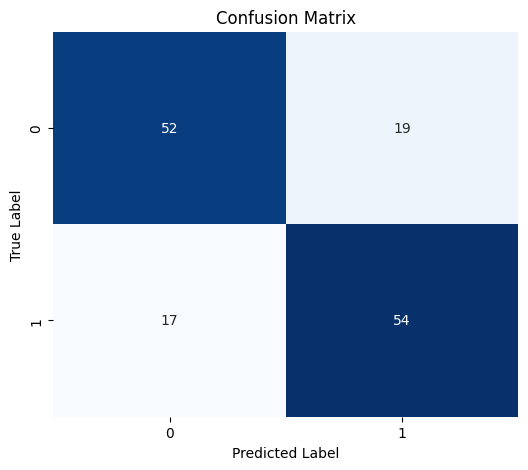

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Task-3: Model Comparison

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [18]:
logistic_y_pred = model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

Decision Tree Classifier

In [19]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
tree_y_pred = tree_model.predict(X_test)

In [21]:
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_f1 = f1_score(y_test, tree_y_pred)

In [22]:
print("\n--- Logistic Regression ---")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"F1 Score: {logistic_f1:.2f}")

print("\n---- Decision Tree ----")
print(f"Accuracy: {tree_accuracy:.2f}")
print(f"F1 Score: {tree_f1:.2f}")


--- Logistic Regression ---
Accuracy: 0.75
F1 Score: 0.75

---- Decision Tree ----
Accuracy: 0.81
F1 Score: 0.83


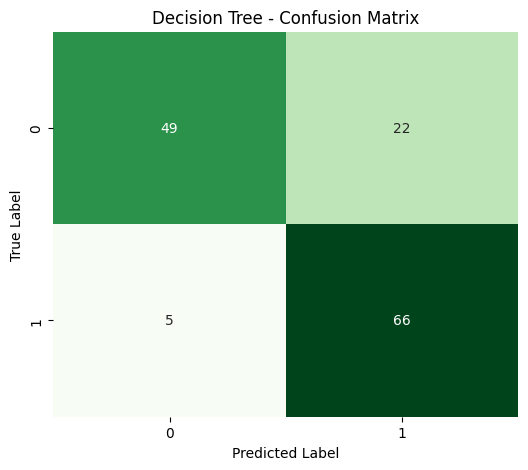

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tree_conf_matrix = confusion_matrix(y_test, tree_y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()